## Arewa Data Science Academy
### Deep Learning Cohort1.0

#### Name: Muhammad Ibrahim Isah 
#### Email: muhammadibrahimisah0@gmail.com
#### Title: Week 5 Solution

### Exercises Solution

Q1. What are 3 areas in industry where computer vision is currently being used?

Computer vision is used in:

1. Autonomous Vehicles: For object detection and navigation.
2. Manufacturing: For quality control and inspection.
3. Healthcare: For medical imaging analysis and disease diagnosis.

In [45]:
# Q2 Recreate the data loading functions we built in sections 1, 2, 3 and 4 of notebook 04. You should have train and test `DataLoader`'s ready to use.

from pathlib import Path
import zipfile


# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {image_path}")
  zip_ref.extractall(image_path) 

Unzipping pizza, steak, suhsi data to data\pizza_steak_sushi


In [46]:
# Check the folders in our image path
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [47]:
# set up the training and test directories
train_dir = image_path / "train"
test_dir = image_path / "test"

# Walk through the train and test directories
walk_through_dir(train_dir)
walk_through_dir(test_dir)

train_dir, test_dir

There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.


(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

pizza
Random image path: data\pizza_steak_sushi\train\pizza\2190018.jpg
Image size: (512, 512)
Image mode: RGB
Image format: JPEG
Image class: pizza
Image height: 512
Image width: 512


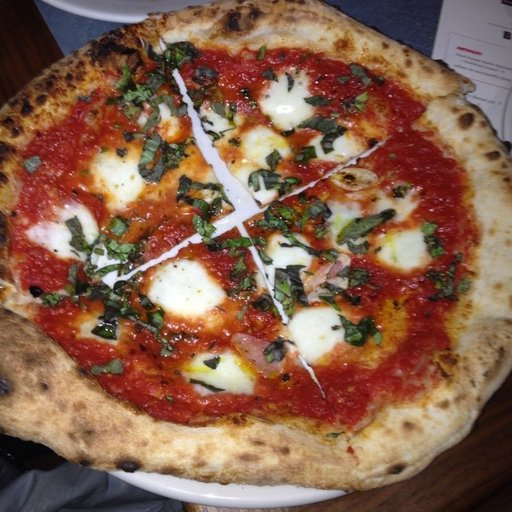

In [48]:
# visualize image with PIL
from PIL import Image
import random

# get all image path list
all_image_paths = [(path) for path in list(train_dir.glob("*/*")) + list(test_dir.glob("*/*"))]
# choose random image
random_image_path = random.choice(all_image_paths)

# Get image class from path name
class_name = random_image_path.parent.name
print(class_name)
# open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")
print(f"Image format: {img.format}")
print(f"Image class: {class_name}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

# show image
img


Image shape: (307, 512, 3)


array([[[ 79,  74,  80],
        [ 86,  81,  85],
        [ 89,  85,  86],
        ...,
        [  2,   2,   2],
        [  5,   3,   4],
        [  6,   4,   5]],

       [[ 94,  89,  95],
        [102,  97, 101],
        [105, 101, 100],
        ...,
        [  3,   3,   3],
        [  5,   3,   4],
        [  6,   4,   5]],

       [[ 96,  91,  95],
        [104, 100, 101],
        [107, 102,  99],
        ...,
        [  3,   3,   3],
        [  4,   2,   3],
        [  5,   3,   4]],

       ...,

       [[189, 143, 119],
        [191, 145, 121],
        [190, 146, 121],
        ...,
        [ 15,  10,   7],
        [ 17,   9,   7],
        [ 16,   8,   6]],

       [[192, 146, 122],
        [194, 148, 124],
        [193, 149, 124],
        ...,
        [ 17,   9,   7],
        [ 18,   8,   7],
        [ 17,   7,   6]],

       [[193, 147, 123],
        [195, 149, 125],
        [196, 152, 127],
        ...,
        [ 17,   9,   7],
        [ 17,   7,   6],
        [ 16,   6,   5]]

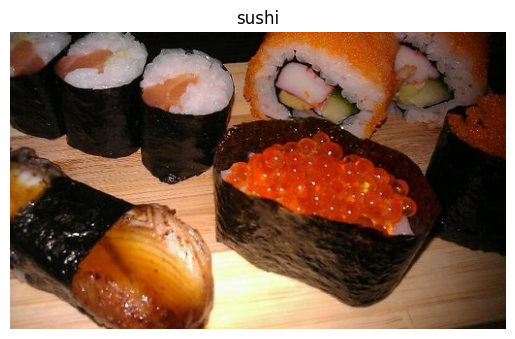

In [49]:
# Do the image visualization with matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir / target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder / random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    
    return img

view_random_image(target_dir=train_dir, target_class="sushi")

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [50]:
# 3.1 Transforming data with torchvision.transforms

import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import torchvision.transforms as transforms

# Define the transform
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor()
])


In [53]:
# Write a function to plot transformed images


def plot_transformed_image(image_path, transform, n=3, seed=42):
    """
    Plot n transformed images
    """
    # Set seed
    torch.manual_seed(seed)
    
    # Create a figure and axis
    fig, ax = plt.subplots(n, 2, figsize=(10, 7))
    
    # Loop through n times
    for i in range(n):
        # Open an image file
        image = Image.open(all_image_paths[i])
        
        # Apply the transformation
        transformed_image = transform(image)
        
        # Plot the original image and height and width
        ax[i, 0].imshow(image)
        ax[i, 0].set_title(f"Original Image: Height: {image.height}, Width: {image.width}",)
        ax[i, 0].axis("off")
        
        # Plot the transformed image and height and width
        ax[i, 1].imshow(transformed_image.permute(1, 2, 0))
        ax[i, 1].set_title(f"Transformed Image: Height: {transformed_image.shape[1]}, Width: {transformed_image.shape[2]}")
        ax[i, 1].axis("off")
    


In [54]:
random.sample(all_image_paths, k=3)

[WindowsPath('data/pizza_steak_sushi/train/pizza/2569760.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/sushi/3004029.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/2190018.jpg')]

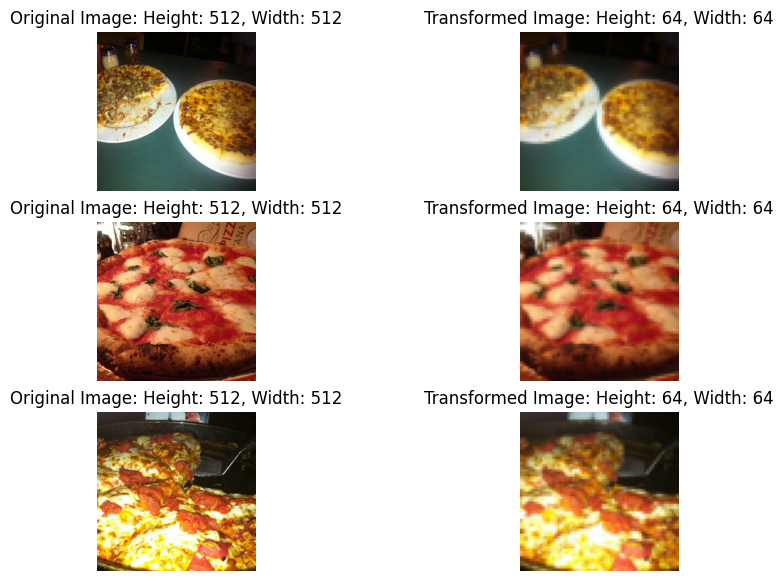

In [55]:
plot_transformed_image(all_image_paths, data_transform, n=3)

In [56]:
# Use ImageFolder to create dataset(s)

from torchvision.datasets import ImageFolder

train_data = ImageFolder(root=train_dir, transform=data_transform)

test_data = ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.3)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.3)
                ToTensor()
            ))

In [57]:
# Get class names as a list

class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [58]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [59]:
# Check the lengths of each dataset

len(train_data), len(test_data)

(225, 75)

In [62]:
# Turn train and test Datasets into DataLoaders

batch_size = 1

train_data_loader = DataLoader(train_data, batch_size, shuffle=True)

test_data_loader = DataLoader(test_data, batch_size, shuffle=False)

train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x1f5f4833d60>,
 <torch.utils.data.dataloader.DataLoader at 0x1f5f4833850>)

In [63]:
# How many batches of images are in our data loaders?

len(train_data_loader),len(test_data_loader)

(225, 75)

In [64]:
# Q3. Recreate `model_0` we built in section 7 of notebook 04.


import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape))
        
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    # print(f"Layer 3 shape: {x.shape}")
    return x    

In [65]:
model_0 = TinyVGG(input_shape=3, hidden_units=64, output_shape=3)

In [66]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=3, bias=True)
  )
)

In [106]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
  
    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc 

In [107]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [108]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

In [111]:
# Q5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results? * Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names))

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_data_loader,
                        test_dataloader=test_data_loader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.3022 | test_loss: 1.0965 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1002 | train_acc: 0.3022 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.2844 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0991 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0991 | train_acc: 0.3200 | test_loss: 1.0976 | test_acc: 0.4133


In [112]:
# Q6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

# train for 20 epochs

model_3_results = train(model=model_3,
                        train_dataloader=train_data_loader,
                        test_dataloader=test_data_loader,
                        optimizer=optimizer,
                        epochs=20) 

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0986 | train_acc: 0.3556 | test_loss: 1.0928 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0520 | train_acc: 0.4267 | test_loss: 0.9876 | test_acc: 0.4667
Epoch: 3 | train_loss: 0.9593 | train_acc: 0.5689 | test_loss: 0.9936 | test_acc: 0.5067
Epoch: 4 | train_loss: 0.9024 | train_acc: 0.6089 | test_loss: 1.0435 | test_acc: 0.4400
Epoch: 5 | train_loss: 0.8927 | train_acc: 0.6089 | test_loss: 1.2296 | test_acc: 0.4400
Epoch: 6 | train_loss: 0.8551 | train_acc: 0.6311 | test_loss: 0.9592 | test_acc: 0.4933
Epoch: 7 | train_loss: 0.8431 | train_acc: 0.6311 | test_loss: 1.0192 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.7963 | train_acc: 0.6711 | test_loss: 1.0089 | test_acc: 0.4933
Epoch: 9 | train_loss: 0.7327 | train_acc: 0.7111 | test_loss: 1.1640 | test_acc: 0.4667
Epoch: 10 | train_loss: 0.6862 | train_acc: 0.7378 | test_loss: 1.0749 | test_acc: 0.4400
Epoch: 11 | train_loss: 0.7048 | train_acc: 0.7333 | test_loss: 1.1539 | test_acc: 0.4933
Epoch: 12 | train_l

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [116]:

image_path = data_path / "pizza_steak_sushi_20_percent"

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

Unzipping pizza, steak, sushi 20% data...


In [117]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


In [118]:
# Turn the data into datasets and dataloaders
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [123]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent, 
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)

In [125]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

# train for 20 epochs

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1042 | train_acc: 0.3312 | test_loss: 1.1005 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0837 | train_acc: 0.3917 | test_loss: 1.0700 | test_acc: 0.4313
Epoch: 3 | train_loss: 1.0298 | train_acc: 0.4521 | test_loss: 0.9504 | test_acc: 0.5659
Epoch: 4 | train_loss: 0.9289 | train_acc: 0.5646 | test_loss: 0.9161 | test_acc: 0.5722
Epoch: 5 | train_loss: 0.8645 | train_acc: 0.6521 | test_loss: 0.9281 | test_acc: 0.5301
Epoch: 6 | train_loss: 0.8469 | train_acc: 0.6438 | test_loss: 1.0400 | test_acc: 0.4750
Epoch: 7 | train_loss: 0.9114 | train_acc: 0.5312 | test_loss: 0.9036 | test_acc: 0.5301
Epoch: 8 | train_loss: 0.7603 | train_acc: 0.6771 | test_loss: 0.9497 | test_acc: 0.5727
Epoch: 9 | train_loss: 0.7902 | train_acc: 0.6458 | test_loss: 0.9277 | test_acc: 0.5193
Epoch: 10 | train_loss: 0.7785 | train_acc: 0.6646 | test_loss: 0.8709 | test_acc: 0.6227
Epoch: 11 | train_loss: 0.7246 | train_acc: 0.7063 | test_loss: 0.8682 | test_acc: 0.6028
Epoch: 12 | train_l

In [151]:
# Q8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. * Does the model you trained in exercise 7 get it right? * If not, what do you think you could do to improve it?
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [152]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

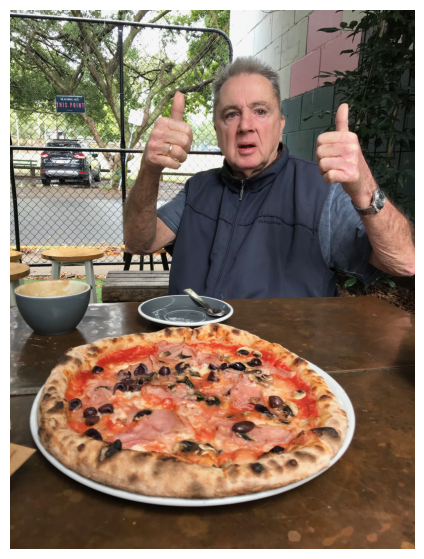

In [153]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

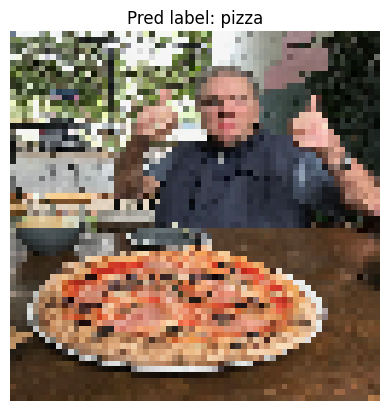

In [154]:
# Make a prediction on the image
model_4.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0)

  # Predict on image
  y_pred_logit = model_4(batch) 

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);